In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import pickle as pkl

from tensorflow.keras.layers import Input
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
import torch
import torch.nn as nn
import keras
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization



from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from PIL import Image, ImageChops, ImageEnhance
from sklearn.utils import shuffle
import tensorflow as tf

In [90]:
fake_image_path='./dataset_1/train_data/tp'
fake_image_data=os.listdir(fake_image_path)
fake_image_data



['image_0t.png',
 'image_100t.png',
 'image_101t.png',
 'image_102t.png',
 'image_103t.png',
 'image_104t.png',
 'image_105t.png',
 'image_106t.png',
 'image_107t.png',
 'image_108t.png',
 'image_109t.png',
 'image_10t.png',
 'image_110t.png',
 'image_111t.png',
 'image_112t.png',
 'image_113t.png',
 'image_114t.png',
 'image_115t.png',
 'image_116t.png',
 'image_117t.png',
 'image_118t.png',
 'image_119t.png',
 'image_11t.png',
 'image_120t.png',
 'image_121t.png',
 'image_122t.png',
 'image_123t.png',
 'image_124t.png',
 'image_125t.png',
 'image_126t.png',
 'image_127t.png',
 'image_128t.png',
 'image_129t.png',
 'image_12t.png',
 'image_130t.png',
 'image_131t.png',
 'image_132t.png',
 'image_133t.png',
 'image_134t.png',
 'image_135t.png',
 'image_136t.png',
 'image_137t.png',
 'image_138t.png',
 'image_139t.png',
 'image_13t.png',
 'image_140t.png',
 'image_141t.png',
 'image_142t.png',
 'image_143t.png',
 'image_144t.png',
 'image_145t.png',
 'image_146t.png',
 'image_147t.png',

In [91]:
real_image_path='./dataset_1/train_data/au'
real_image_data=os.listdir(real_image_path)
real_image_data


['Au_0.png',
 'Au_1.png',
 'Au_10.png',
 'Au_100.png',
 'Au_1000.png',
 'Au_1001.png',
 'Au_1002.png',
 'Au_1003.png',
 'Au_1004.png',
 'Au_1005.png',
 'Au_1006.png',
 'Au_1007.png',
 'Au_1008.png',
 'Au_1009.png',
 'Au_101.png',
 'Au_1010.png',
 'Au_1011.png',
 'Au_1012.png',
 'Au_1013.png',
 'Au_1014.png',
 'Au_1015.png',
 'Au_1016.png',
 'Au_1017.png',
 'Au_1018.png',
 'Au_1019.png',
 'Au_102.png',
 'Au_1020.png',
 'Au_1021.png',
 'Au_1022.png',
 'Au_1023.png',
 'Au_1024.png',
 'Au_1025.png',
 'Au_1026.png',
 'Au_1027.png',
 'Au_1028.png',
 'Au_1029.png',
 'Au_103.png',
 'Au_1030.png',
 'Au_1031.png',
 'Au_1032.png',
 'Au_1033.png',
 'Au_1034.png',
 'Au_1035.png',
 'Au_1036.png',
 'Au_1037.png',
 'Au_1038.png',
 'Au_1039.png',
 'Au_104.png',
 'Au_1040.png',
 'Au_1041.png',
 'Au_1042.png',
 'Au_1043.png',
 'Au_1044.png',
 'Au_1045.png',
 'Au_1046.png',
 'Au_1047.png',
 'Au_1048.png',
 'Au_1049.png',
 'Au_105.png',
 'Au_1050.png',
 'Au_1051.png',
 'Au_1052.png',
 'Au_1053.png',
 'Au_1

In [92]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

In [93]:
image_size = (128, 128)

def prepare_image(image_path):
  return np.array(convert_to_ela_image(image_path, 85).resize(image_size)) / 255.0

In [94]:
final_image_path='./dataset_1/train_data/train'
final_image_data=os.listdir(final_image_path)
len(final_image_data)
final_image_data[4500][0]


'i'

In [95]:
X=[]
Y=[]


for _, file in tqdm(enumerate(final_image_data)):
    img = os.path.join(final_image_path, file)
    temp_ela_image = prepare_image(img)
    X.append(temp_ela_image)
    if file[0] == 'A':
        Y.append(1)
    else:
        Y.append(0)


0it [00:00, ?it/s]

6000it [01:05, 91.12it/s] 


In [96]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

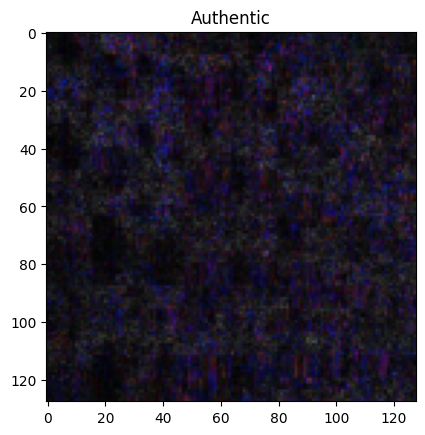

In [97]:
import matplotlib.pyplot as plt
import numpy as np

ran_num=np.random.randint(0, len(X_train))
img=X_train[ran_num]
title=""
if Y_train[ran_num]==0:
  title="Fake"
else:
  title="Authentic"
plt.title(title)
plt.imshow(img)

In [98]:
print(len(X_train))
print(len(X_val))
print(len(Y_train))
print(len(Y_val))

4800
1200
4800
1200


In [99]:
class Dataset:
    def __init__(self, data_x,data_y):
        self.x = []
        self.y = []

        for img in data_x :
            self.x.append(img)

        for lab in data_y :
            self.y.append(lab)


    def __getitem__(self, i):

        return self.x[i],self.y[i]


    def __len__(self): # your model.fit_gen requires this function
        return len(self.x)


class Dataloder(tf.keras.utils.Sequence):
    def __init__(self, dataset, batch_size=1,shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle=shuffle
        self.indexes = np.arange(len(self.dataset.x))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        #batch = [for samples in zip(*data)]
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]

        return tuple([batch[0],batch[1]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

train_dataset=Dataset(X_train,Y_train)
train_dataloader = Dataloder(train_dataset, batch_size=8,shuffle=True)

test_dataset=Dataset(X_val,Y_val)
test_dataloader = Dataloder(test_dataset, batch_size=8,shuffle=True)

In [100]:
from tensorflow.keras.models import Model

Input_shape=Input(shape=(128,128,3))
conv11=Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu")(Input_shape)
conv12=Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(conv11)
conv13=MaxPool2D(pool_size=(2,2),strides=(2,2))(conv12)
conv13=Dropout(0.3)(conv13)

conv11=Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu")(conv13)
conv12=Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(conv11)
conv13=MaxPool2D(pool_size=(2,2),strides=(2,2))(conv12)
conv13=Dropout(0.3)(conv13)

flatten1=Flatten()(conv13)
dense1=Dense(units=16,activation="relu")(flatten1)
dense2=Dense(units=8,activation="relu")(dense1)
output=Dense(units=1, activation="sigmoid")(dense2)

model_1=Model(inputs=Input_shape,outputs=output)
print(model_1.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 128)       73856     
                                                           

In [101]:
plot_model(model_1, show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
model_1.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
def scheduler(epoch,lr) :
  if epoch%5==0 :
    lr=0.9*lr

  return lr
lrScheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
es=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)

In [ ]:
hist=model_1.fit_generator(train_dataloader, steps_per_epoch=len(train_dataloader)//8, validation_data=test_dataloader, validation_steps=len(test_dataloader)//8, epochs=30, callbacks=lrScheduler)

Epoch 1/30


C:\Users\abhis\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


75/75 [==============================] - 16s 161ms/step - loss: 0.6936 - accuracy: 0.4650 - val_loss: 0.6925 - val_accuracy: 0.5764 - lr: 9.0000e-05
Epoch 2/30
75/75 [==============================] - 11s 142ms/step - loss: 0.6909 - accuracy: 0.5100 - val_loss: 0.6834 - val_accuracy: 0.5417 - lr: 9.0000e-05
Epoch 3/30
75/75 [==============================] - 9s 123ms/step - loss: 0.6827 - accuracy: 0.5183 - val_loss: 0.6792 - val_accuracy: 0.5833 - lr: 9.0000e-05
Epoch 4/30
75/75 [==============================] - 7s 90ms/step - loss: 0.6133 - accuracy: 0.6350 - val_loss: 0.6042 - val_accuracy: 0.6250 - lr: 9.0000e-05
Epoch 5/30
75/75 [==============================] - 6s 86ms/step - loss: 0.6265 - accuracy: 0.6467 - val_loss: 0.5776 - val_accuracy: 0.7292 - lr: 9.0000e-05
Epoch 6/30
75/75 [==============================] - 6s 82ms/step - loss: 0.5809 - accuracy: 0.7050 - val_loss: 0.5580 - val_accuracy: 0.7500 - lr: 8.1000e-05
Epoch 7/30
75/75 [==============================] - 6s 84m

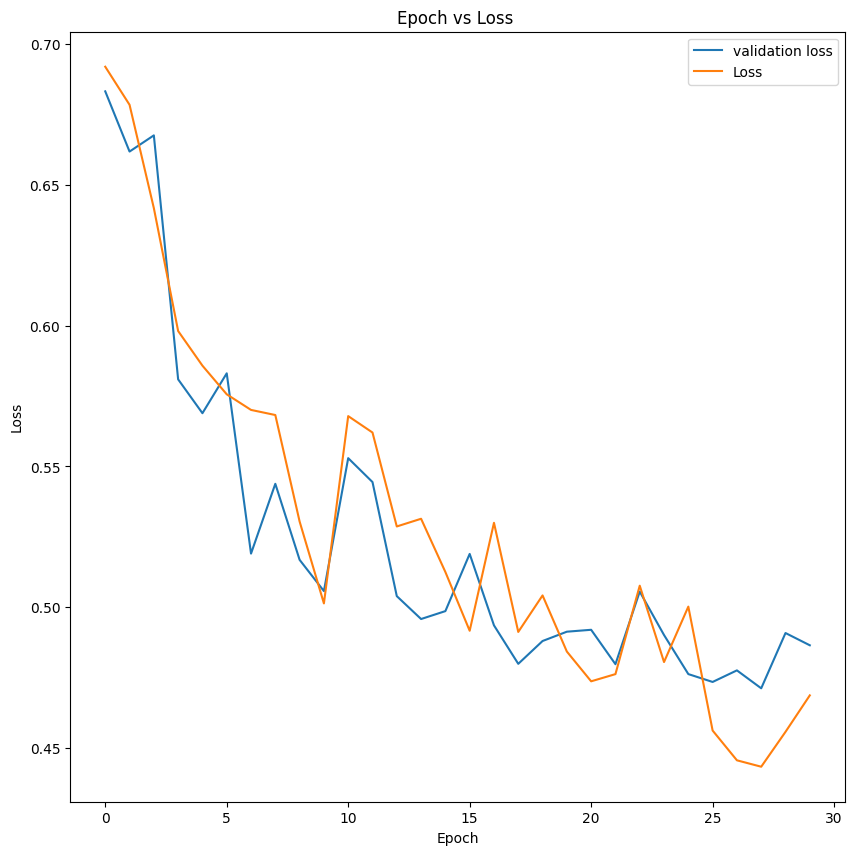

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['val_loss'], label='validation loss')
plt.plot(hist.history['loss'], label='Loss')
plt.title('Epoch vs Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

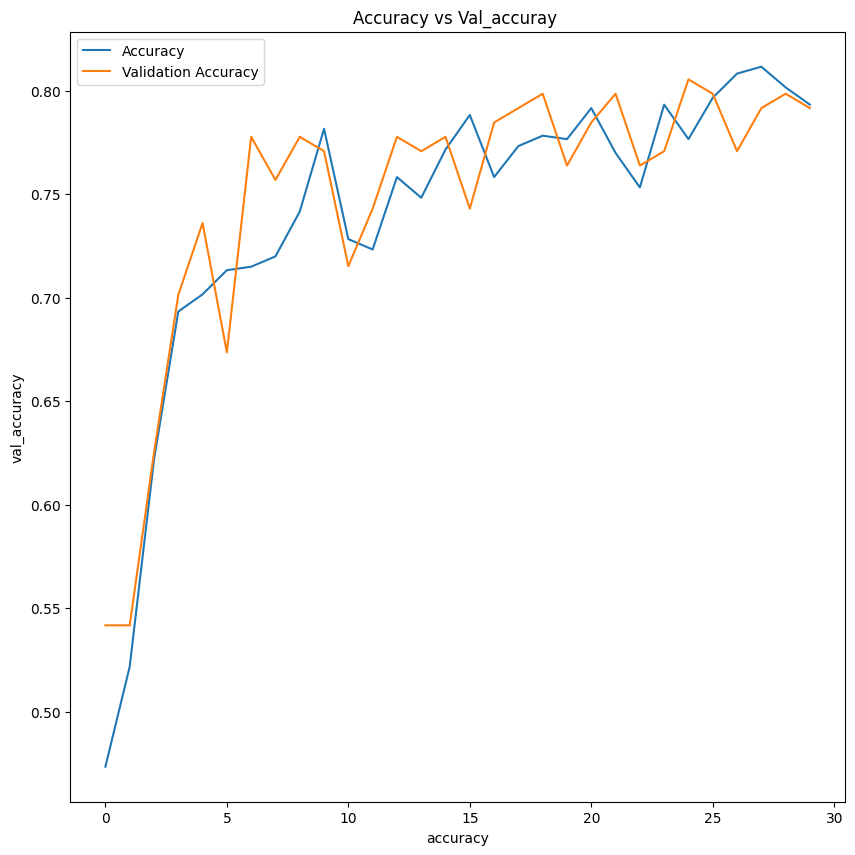

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Val_accuray ')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

In [ ]:
def predict(img_path,model) :
    pi=prepare_image(img_path)
    pi=pi.reshape(1,128,128,3)
    predict=model_1.predict(pi)
    return predict


In [102]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

test_data_path = './dataset_1/train_data/test'
test_data = os.listdir(test_data_path)

for file in tqdm(test_data):
    img_path = os.path.join(test_data_path, file)
    val = predict(img_path, model_1)
    
    # Load the image for display
    img = load_img(img_path, target_size=(224, 224))  # Adjust target size as per your model's input requirement
    img = img_to_array(img) / 255.0  # Normalize for display
    
    print(file)
    print(val)
    # # Plot the image with the prediction as the title
    # plt.figure()
    # plt.title(val)
    # plt.imshow(img)
    
    # plt.axis('off')  # Hide the axis for better visualization
    # plt.show()
    # print("="*100)

  0%|          | 0/33 [00:00<?, ?it/s]

1/1 [==============================] - 1s 902ms/step


  3%|▎         | 1/33 [00:01<00:56,  1.76s/it]

00007tamp3.jpg
[[0.49703753]]
1/1 [==============================] - 0s 30ms/step
Au_0.png
[[0.49724483]]
1/1 [==============================] - 0s 25ms/step


  9%|▉         | 3/33 [00:01<00:15,  1.91it/s]

Au_1.png
[[0.4926889]]
1/1 [==============================] - 0s 22ms/step
Au_10.png
[[0.49773106]]
1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 5/33 [00:02<00:08,  3.41it/s]

Au_11.png
[[0.49727502]]
1/1 [==============================] - 0s 19ms/step
Au_2.png
[[0.493308]]
1/1 [==============================] - 0s 25ms/step


 21%|██        | 7/33 [00:02<00:05,  4.99it/s]

Au_3.png
[[0.49579948]]
1/1 [==============================] - 0s 28ms/step
Au_4.png
[[0.49663758]]
1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 9/33 [00:02<00:03,  6.46it/s]

Au_5.png
[[0.49426872]]
1/1 [==============================] - 0s 20ms/step
Au_6.png
[[0.49614057]]
1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 11/33 [00:02<00:02,  8.10it/s]

Au_7.png
[[0.4946146]]
1/1 [==============================] - 0s 32ms/step
Au_8.png
[[0.4967363]]
1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 13/33 [00:02<00:02,  8.77it/s]

Au_9.png
[[0.49648732]]
1/1 [==============================] - 0s 16ms/step
DSC_0097tamp12.jpg
[[0.49746436]]
1/1 [==============================] - 0s 16ms/step


 45%|████▌     | 15/33 [00:03<00:02,  6.26it/s]

DSC_0153tamp3.jpg
[[0.4978146]]
1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 16/33 [00:03<00:03,  5.56it/s]

DSC_0215tamp4.jpg
[[0.49798623]]
1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 17/33 [00:03<00:03,  5.09it/s]

DSC_0242_01tamp12.jpg
[[0.4979322]]
1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 18/33 [00:04<00:03,  4.70it/s]

DSC_0254tamp5.jpg
[[0.49914423]]
1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 19/33 [00:04<00:03,  4.42it/s]

DSC_0318_scale.jpg
[[0.4966704]]
1/1 [==============================] - 0s 23ms/step


 61%|██████    | 20/33 [00:04<00:03,  4.15it/s]

DSC_0409tamp4.jpg
[[0.49713898]]
1/1 [==============================] - 0s 15ms/step


 64%|██████▎   | 21/33 [00:04<00:03,  3.97it/s]

DSC_0535tamp4.jpg
[[0.49578777]]
1/1 [==============================] - 0s 15ms/step


 67%|██████▋   | 22/33 [00:05<00:02,  3.74it/s]

DSC_0648tamp10.jpg
[[0.49644905]]
1/1 [==============================] - 0s 16ms/step


 70%|██████▉   | 23/33 [00:05<00:02,  3.76it/s]

DSC_0670_scale.jpg
[[0.4992554]]
1/1 [==============================] - 0s 15ms/step
image_0t.png
[[0.49354613]]
1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 25/33 [00:05<00:01,  5.33it/s]

image_1t.png
[[0.49708998]]
1/1 [==============================] - 0s 25ms/step
image_2t.png
[[0.4911044]]
1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 27/33 [00:05<00:00,  6.76it/s]

image_3t.png
[[0.49579087]]
1/1 [==============================] - 0s 6ms/step
image_4t.png
[[0.49554726]]
1/1 [==============================] - 0s 14ms/step


 88%|████████▊ | 29/33 [00:05<00:00,  7.94it/s]

image_5t.png
[[0.49580845]]
1/1 [==============================] - 0s 17ms/step
image_6t.png
[[0.49147877]]
1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 31/33 [00:06<00:00,  8.81it/s]

image_7t.png
[[0.49273276]]
1/1 [==============================] - 0s 7ms/step
image_8t.png
[[0.49449039]]
1/1 [==============================] - 0s 25ms/step


100%|██████████| 33/33 [00:06<00:00,  5.25it/s]

image_9t.png
[[0.4967317]]
